In [1]:
from pycqed.instrument_drivers.physical_instruments.QuTech_AWG_Module \
    import QuTech_AWG_Module
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
%matplotlib inline

#qwgDevice = "QWG1"
qwgDevice = "QWG2"

ip = None;

if qwgDevice == "QWG1":
    ip = "192.168.0.10"
elif qwgDevice == "QWG2":
    ip = "192.168.0.11"
else:
    raise RuntimeError('Did not select support device')
    exit()

qwg1 = QuTech_AWG_Module(
    'QWG', address=ip,
    port=5025)

Connected to: QuTech QWG (serial:, firmware:swVersion=0.9beta16-CW_BITS=7-IOB_V2 swBuild=20171109-12:12:51 fwVersion=0.1.14 fwBuild=20171103-15:23:08 kmodVersion=0.79 kmodBuild=20171109-10:22:53) in 0.11s


In [2]:
qwg1.reset()

In [3]:
qwg1.stop()

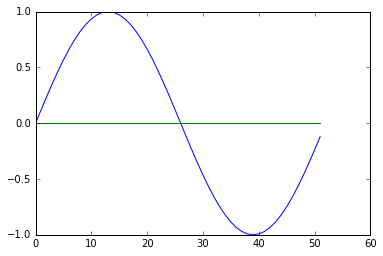

In [4]:
fs = 1e9
# For continuous mode this value should be a multiple of 4e-9
time = 52e-9

length = int(time*fs)
halflength = int(time*fs/2)

waveformLine = []
for x in range(0, length):
    waveformLine.append(0)

waveformSine = np.sin(np.arange(length)*2*np.pi/(length))
waveformCosine = np.cos(np.arange(length)*2*np.pi/length)

qwg1.createWaveformReal('sin', waveformSine)
qwg1.createWaveformReal('line', waveformLine)
plt.plot(waveformSine)
plt.plot(waveformLine)


In [5]:
# Set for continuous
qwg1.set('ch1_default_waveform', 'sin')
qwg1.set('ch2_default_waveform', 'line')
qwg1.set('ch3_default_waveform', 'sin')
qwg1.set('ch4_default_waveform', 'sin')

In [6]:
qwg1.ch_pair1_transform_matrix(np.array([[1, 0],[1, 1]]))
qwg1.ch_pair3_transform_matrix(np.array([[1, 0],[0, 1]]))

In [7]:
qwg1.ch_pair1_sideband_frequency.set(20e6)
qwg1.ch_pair3_sideband_frequency.set(0)

In [8]:
qwg1.ch1_offset(0.2)
qwg1.ch2_offset(0)
qwg1.ch3_offset(0)
qwg1.ch4_offset(0)

In [9]:
qwg1.ch1_amp(1.8)
qwg1.ch2_amp(1.8)
qwg1.ch3_amp(1)
qwg1.ch4_amp(1)

In [10]:
qwg1.ch1_state(True)
qwg1.ch2_state(True)
qwg1.ch3_state(True)
qwg1.ch4_state(True)

qwg1.run_mode('CONt')
qwg1.start()

In [11]:
qwg1.stop()

RuntimeError: ['Wave overflow detected on channel: 1', 'Wave overflow detected on channel: 2']